**Question 3:**

**KNN Classifier:**

**Part A:**

Loading the data and putting to test and train sets, and organizing the indices:

In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = load_wine()
data = dataset['data']
target = dataset['target']
data = pd.DataFrame(data)
label = pd.DataFrame(target, columns=['label'])

In [19]:
df = pd.concat([data, label], axis=1)
mask = np.random.rand(len(df)) <= 0.8
train = df[mask]
y_train = train['label']
x_train = train.drop(['label'], axis=1)
test = df[~mask]
y_test = test['label']
x_test = test.drop(['label'], axis=1)

In [20]:
x_train.index=range(len(x_train))
y_train.index=range(len(y_train))
x_test.index=range(len(x_test))
y_test.index=range(len(y_test))

A function to calculate the distance:

In [5]:
def dist(x,y):   
    return np.sqrt(np.sum((x-y)**2))

The KNN classifier function from scratch:

In [6]:
def KNN_Classifier (x_train, y_train, x_test, k):
    yhat = []
    overall_class_list = []
    for i in range(len(x_test)):
        x_t = x_test.iloc[i]
        distance_list = []
        index_list = []
        for j in range(len(x_train)):
            second_data = x_train.iloc[j]
            distance_list.append(dist(x_t,second_data))
            index_list.append(j)
        distance = pd.DataFrame(distance_list, columns = ['distance'])
        index = pd.DataFrame(index_list, columns = ['index'])
        result = pd.concat([distance, index], axis=1)
        result_sorted = result.sort_values(by = 'distance')
        index_list = list(result_sorted['index'][:k])
        distance = list(result_sorted['distance'][:k])
        class_list = []
        for index in index_list:
            class_list.append(y_train[index])
                
        overall_class_list.append(class_list)
        yhat.append(max(class_list,key=class_list.count))
    return yhat, overall_class_list

A function to calculate accuracy:

In [7]:
def accuracy (y_test, yhat):
    correct = 0
    for i in range (len(y_test)):
        if (y_test.loc[i] == yhat[i]):
            correct+=1
    return (correct*100/len(y_test))


A fuction to print the confusion matrix:

In [8]:
def confusion_matrix (y_test, yhat):
    t0 = t1 = t2 = f01 = f02 = f10 = f12 = f20 = f21 = 0
    for i in range (len(y_test)):
        y_predicted = yhat[i]
        if(y_test.loc[i] == y_predicted):
            if(y_predicted == 0): 
                t0 += 1
            elif(y_predicted == 1): 
                t1 += 1
            else: 
                t2 += 1
        else:
            if(y_predicted==0 and y_test.loc[i]==1):
                f01+=1
            elif (y_predicted==0 and y_test.loc[i]==2):
                f02+=1
            elif (y_predicted==1 and y_test.loc[i]==0):
                f10+=1
            elif (y_predicted==1 and y_test.loc[i]==2):
                f12+=1
            elif (y_predicted==2 and y_test.loc[i]==0):
                f20+=1
            elif (y_predicted==2 and y_test.loc[i]==1):
                f21+=1
    confusion_matrix = [[t0, f01, f02],
                      [f10, t1, f12],
                      [f20, f21,t2]]
    print(confusion_matrix)

For k = 10:

In [21]:
k = 10
y_predicted_k10 = [None]*len(y_test)
overall_class_list_10 = [None]*len(y_test)
y_predicted_k10, overall_class_list_10 = KNN_Classifier(x_train, y_train, x_test, k)
print('accuracy = ',  accuracy (y_test, y_predicted_k10))
confusion_matrix(y_test, y_predicted_k10)

accuracy =  79.48717948717949
[[13, 0, 0], [0, 7, 2], [2, 4, 11]]


For k = 5:

In [22]:
k = 5
y_predicted_k5 = [None]*len(y_test)
overall_class_list_5 = [None]*len(y_test)
y_predicted_k5, overall_class_list_5 = KNN_Classifier(x_train, y_train, x_test, k)
print('accuracy = ',  accuracy (y_test, y_predicted_k5))
confusion_matrix(y_test, y_predicted_k5)

accuracy =  69.23076923076923
[[13, 0, 0], [1, 7, 6], [1, 4, 7]]


For k = 20:

In [23]:
k = 20
y_predicted_k20 = [None]*len(y_test)
overall_class_list_20 = [None]*len(y_test)
y_predicted_k20, overall_class_list_20 = KNN_Classifier(x_train, y_train, x_test, k)
print('accuracy = ',  accuracy (y_test, y_predicted_k20))
confusion_matrix(y_test, y_predicted_k20)

accuracy =  76.92307692307692
[[13, 0, 0], [0, 8, 4], [2, 3, 9]]


For k = 1:

In [24]:
k = 1
y_predicted_k1 = [None]*len(y_test)
overall_class_list_1 = [None]*len(y_test)
y_predicted_k1, overall_class_list_1 = KNN_Classifier(x_train, y_train, x_test, k)
print('accuracy = ',  accuracy (y_test, y_predicted_k1))
confusion_matrix(y_test, y_predicted_k1)

accuracy =  74.35897435897436
[[13, 0, 0], [1, 6, 3], [1, 5, 10]]


**Part B:**

A function to return the probability of true or fasle for each data in a dataframe:

In [34]:
def probability_calc (y_test, y_predicted, class_list):
    p = []
    l = []
    for i in range (len(y_test)):
        if (y_test.loc[i] == y_predicted [i]):
            label = 'True'
            count = class_list[i].count(y_test.loc[i])
            probability = count / len(class_list[i])
        else:
            label = 'False'
            count = class_list[i].count(y_test.loc[i])
            probability = 1 - (count / len(class_list[i]))
        p.append(probability)
        l.append(label)
    probs = pd.DataFrame(p, columns = ['prob'])
    labels = pd.DataFrame(l, columns = ['label'])
    result = pd.concat([probs, labels], axis=1)
    return result

A function to plot the count of each probability:

In [35]:
def plot_graph (result, k):
    sns.countplot(data=result, x = 'label', hue = 'prob')
    plt.legend(bbox_to_anchor=(1.2,1), loc='upper right', borderaxespad=0)

k = 10:

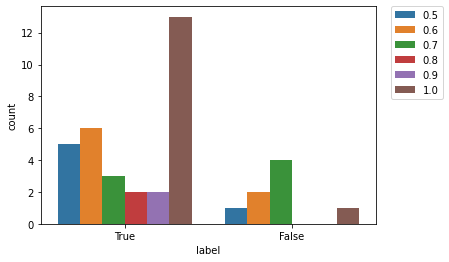

In [36]:
probability_10 = probability_calc (y_test, y_predicted_k10, overall_class_list_10)
plot_graph(probability_10, 10)

k = 5:

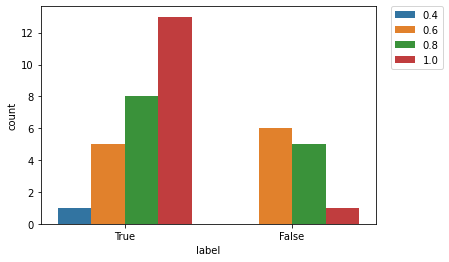

In [37]:
probability_5 = probability_calc (y_test, y_predicted_k5, overall_class_list_5)
plot_graph(probability_5, 5)

k = 20:

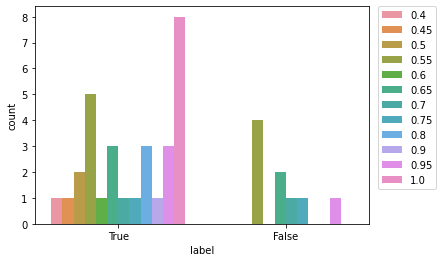

In [38]:
probability_20 = probability_calc (y_test, y_predicted_k20, overall_class_list_20)
plot_graph(probability_20, 20)

k = 1:

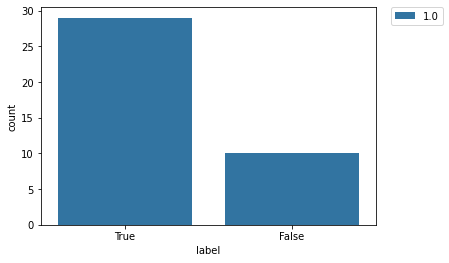

In [39]:
probability_1 = probability_calc(y_test, y_predicted_k1, overall_class_list_1)
plot_graph(probability_1, 1)

**Metric Learning:**

**Part B - 2:**

In [42]:
!pip install metric-learn
from metric_learn import LMNN
from metric_learn import LFDA

     |████████████████████████████████| 64 kB 168 kB/s eta 0:00:01


**LMNN:**

A function to plot the data:

In [45]:
from sklearn.manifold import TSNE
def plot_new(x_train, y_train):
    tsne = TSNE()
    x_new = tsne.fit_transform(x_train)
    plt.scatter(x_new[:, 0], x_new[:, 1], c=y_train, cmap=plt.cm.Paired)
    plt.xticks(())
    plt.yticks(())
    plt.show()

In [70]:
def LMNN_calc (x_train, y_train, x_test, K):
    lmnn = LMNN(k=K, n_components=2)
    lmnn.fit(x_train, y_train)
    x_train_new = lmnn.transform(x_train)
    x_test_new = lmnn.transform(x_test)
    return x_train_new, x_test_new

Initial data:

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


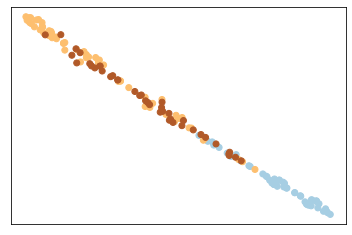

In [123]:
plot_new(x_train, y_train)

k = 1:

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


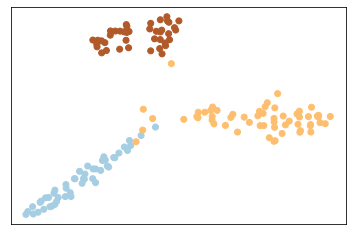

In [99]:
x_new_1, x_test_1 = LMNN_calc (x_train, y_train, x_test, 1)
plot_new(x_new_1, y_train)

k = 5:

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


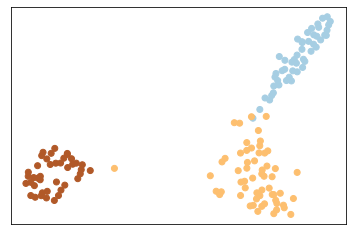

In [100]:
x_new_5, x_test_5 = LMNN_calc (x_train, y_train, x_test, 5)
plot_new(x_new_5, y_train)

k = 15:

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


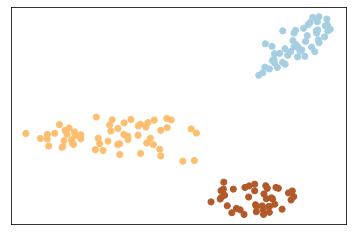

In [101]:
x_new_15, x_test_15 = LMNN_calc (x_train, y_train, x_test, 15)
plot_new(x_new_15, y_train)

As it can be seen from the plots above, the best classification happens for k = 15.

Accuracy and Confusion Matrix for k = 15 transform: 

In [50]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [78]:
x_train_new = pd.DataFrame(x_new_15)
x_test_new = pd.DataFrame(x_test_15)

k = 10:

In [79]:
k = 10
y_k10 = [None]*len(y_test)
class_list_10 = [None]*len(y_test)
y_k10, class_list_10 = KNN_Classifier(x_train_new, y_train, x_test_new, k)
print('accuracy = ', accuracy_score(y_test, y_k10))
confusion_matrix(y_test, y_k10)

accuracy =  0.9666666666666667


array([[10,  0,  0],
       [ 1, 12,  0],
       [ 0,  0,  7]])

k = 5:

In [81]:
k = 5
y_k5 = [None]*len(y_test)
class_list_5 = [None]*len(y_test)
y_k5, class_list_5 = KNN_Classifier(x_train_new, y_train, x_test_new, k)
print('accuracy = ', accuracy_score(y_test, y_k5))
confusion_matrix(y_test, y_k5)

accuracy =  0.9666666666666667


array([[10,  0,  0],
       [ 1, 12,  0],
       [ 0,  0,  7]])

k = 20:

In [83]:
k = 20
y_k20 = [None]*len(y_test)
class_list_20 = [None]*len(y_test)
y_k20, class_list_20 = KNN_Classifier(x_train_new, y_train, x_test_new, k)
print('accuracy = ', accuracy_score(y_test, y_k20))
confusion_matrix(y_test, y_k20)

accuracy =  1.0


array([[10,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  7]])

k = 1:

In [84]:
k = 1
y_k1 = [None]*len(y_test)
class_list_1 = [None]*len(y_test)
y_k1, class_list_1 = KNN_Classifier(x_train_new, y_train, x_test_new, k)
print('accuracy = ', accuracy_score(y_test, y_k1))
confusion_matrix(y_test, y_k1)

accuracy =  1.0


array([[10,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  7]])

Correlation Matrix:

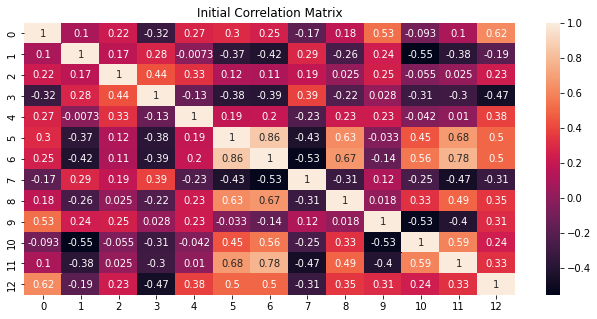

In [119]:
corr_matrix_initial = x_train.corr()
plt.figure(figsize=(11, 5))
plt.title('Initial Correlation Matrix')
sns.heatmap(corr_matrix_initial, annot=True)

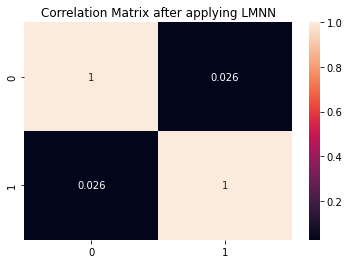

In [120]:
corr_matrix_final = x_train_new.corr()
plt.title('Correlation Matrix after applying LMNN')
sns.heatmap(corr_matrix_final, annot=True)

**LFDA:**

In [43]:
def LFDA_calc (x_train, y_train, x_test, K):
    lfda = LFDA(k=K, n_components=2)
    lfda.fit(x_train, y_train)
    x_train_new = lfda.transform(x_train)
    x_test_new = lfda.transform(x_test)
    return x_train_new, x_test_new

k = 1:

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


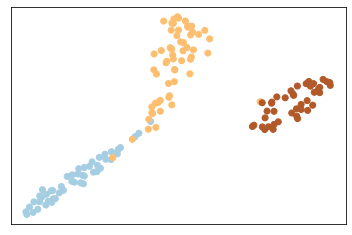

In [103]:
x_new_1, x_test_1 = LFDA_calc (x_train, y_train, x_test, 1)
plot_new(x_new_1, y_train)

k = 5:

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


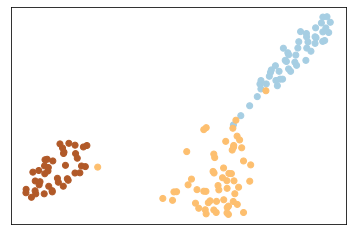

In [104]:
x_new_5, x_test_5 = LFDA_calc (x_train, y_train, x_test, 5)
plot_new(x_new_5, y_train)

k = 15:

/Users/Nika/opt/anaconda3/lib/python3.8/site-packages/metric_learn/lfda.py:109: UserWarning: Chosen k (15) too large, using 12 instead.
  warnings.warn('Chosen k (%d) too large, using %d instead.'


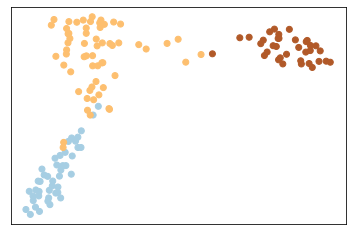

In [46]:
x_new_15, x_test_15 = LFDA_calc (x_train, y_train, x_test, 15)
plot_new(x_new_15, y_train)

As it can be seen from the plots above, the best classification happens for k = 15.

Accuracy and Confusion Matrix for k = 15 transform: 

In [47]:
x_train_new = pd.DataFrame(x_new_15)
x_test_new = pd.DataFrame(x_test_15)

k = 10:

In [51]:
k = 10
y_k10 = [None]*len(y_test)
class_list_10 = [None]*len(y_test)
y_k10, class_list_10 = KNN_Classifier(x_train_new, y_train, x_test_new, k)
print('accuracy = ', accuracy_score(y_test, y_k10))
confusion_matrix(y_test, y_k10)

accuracy =  0.9743589743589743


array([[14,  1,  0],
       [ 0, 11,  0],
       [ 0,  0, 13]])

k = 5:

In [108]:
k = 5
y_k5 = [None]*len(y_test)
class_list_5 = [None]*len(y_test)
y_k5, class_list_5 = KNN_Classifier(x_train_new, y_train, x_test_new, k)
print('accuracy = ', accuracy_score(y_test, y_k5))
confusion_matrix(y_test, y_k5)

accuracy =  0.9666666666666667


array([[10,  0,  0],
       [ 1, 12,  0],
       [ 0,  0,  7]])

k = 20:

In [109]:
k = 20
y_k20 = [None]*len(y_test)
class_list_20 = [None]*len(y_test)
y_k20, class_list_20 = KNN_Classifier(x_train_new, y_train, x_test_new, k)
print('accuracy = ', accuracy_score(y_test, y_k20))
confusion_matrix(y_test, y_k20)

accuracy =  0.9666666666666667


array([[10,  0,  0],
       [ 1, 12,  0],
       [ 0,  0,  7]])

k = 1:

In [113]:
k = 1
y_k1 = [None]*len(y_test)
class_list_1 = [None]*len(y_test)
y_k1, class_list_1 = KNN_Classifier(x_train_new, y_train, x_test_new, k)
print('accuracy = ', accuracy_score(y_test, y_k1))
confusion_matrix(y_test, y_k1)

accuracy =  1.0


array([[10,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  7]])

Correlation Matrix:

<AxesSubplot:title={'center':'Correlation Matrix after applying LFDA'}>

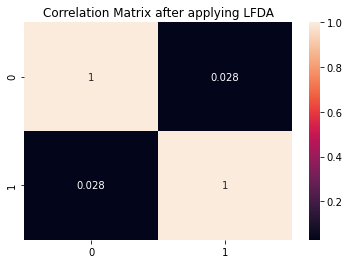

In [49]:
corr_matrix_final = x_train_new.corr()
plt.title('Correlation Matrix after applying LFDA')
sns.heatmap(corr_matrix_final, annot=True)